In [3]:
import pandas as pd 

In [182]:
df = pd.read_csv('/Users/palvishashoaib/Documents/Data/reviews.csv', encoding='latin-1')


In [183]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong
3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) Regardless, kids will love it.",Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Disneyland_HongKong


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/palvishashoaib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palvishashoaib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/palvishashoaib/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
import nltk


In [17]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/palvishashoaib/nltk_data...


True

In [18]:
# Text Preprocessing
def preprocess_text(text):
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply stemming or lemmatization
    porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return stemmed_tokens, lemmatized_tokens

# Example usage
review_text = "This is an example sentence! It includes punctuation, stop words, and needs preprocessing."

stemmed_tokens, lemmatized_tokens = preprocess_text(review_text)

print("Stemmed Tokens:", stemmed_tokens)
print("Lemmatized Tokens:", lemmatized_tokens)


Stemmed Tokens: ['exampl', 'sentenc', 'includ', 'punctuat', 'stop', 'word', 'need', 'preprocess']
Lemmatized Tokens: ['example', 'sentence', 'includes', 'punctuation', 'stop', 'word', 'need', 'preprocessing']


In [19]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Sentiment Analysis with Rating Score
def perform_sentiment_analysis_with_rating(text, rating_score):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    # Mapping sentiment label to rating score
    if sentiment_label == 'Positive':
        if rating_score >= 4:
            sentiment_label = 'Positive'
        else:
            sentiment_label = 'Neutral'
    elif sentiment_label == 'Negative':
        if rating_score <= 2:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'

    return sentiment_label

# Example usage
review_text = "The food was disappointing, but the rides were enjoyable."
rating_score = 3

sentiment_label = perform_sentiment_analysis_with_rating(review_text, rating_score)

print("Sentiment Label:", sentiment_label)


Sentiment Label: Neutral


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/palvishashoaib/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:


# Sentiment Analysis with Branch and Rating
def perform_sentiment_analysis_with_branch_and_rating(df):
    sid = SentimentIntensityAnalyzer()
    sentiment_labels = []

    for index, row in df.iterrows():
        text = row['Review_Text']
        branch = row['Branch']
        rating = row['Rating']

        sentiment_scores = sid.polarity_scores(text)
        compound_score = sentiment_scores['compound']

        if compound_score >= 0.05:
            sentiment_label = 'Positive'
        elif compound_score <= -0.05:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'

        # Map sentiment label to branch and rating
        if sentiment_label == 'Positive':
            if rating >= 4:
                sentiment_label = sentiment_label + ' - High Rating'
            else:
                sentiment_label = sentiment_label + ' - Moderate Rating'
        elif sentiment_label == 'Negative':
            if rating <= 2:
                sentiment_label = sentiment_label + ' - Low Rating'
            else:
                sentiment_label = sentiment_label + ' - Moderate Rating'

        sentiment_label = branch + ' - ' + sentiment_label
        sentiment_labels.append(sentiment_label)

    return sentiment_labels

# Perform sentiment analysis with branch and rating
sentiment_labels = perform_sentiment_analysis_with_branch_and_rating(df)

# Add sentiment labels to the dataset
df['Sentiment_Label'] = sentiment_labels

# Create a dictionary to map branch names to simplified sentiment labels
branch_labels = {
    'Disneyland_HongKong': 'Hong Kong',
    'Disneyland_California': 'California',
    'Disneyland_Paris': 'Paris',
}

# Create a new column for simplified branch names
df['Simplified_Branch'] = df['Branch'].map(branch_labels)

# Display simplified sentiment labels with branch names
df['Simplified_Sentiment_Label'] = df['Simplified_Branch'] + ' - ' + df['Sentiment_Label'].str.split(' - ').str[-1]

# Group by simplified branch and sentiment labels and count occurrences
results = df.groupby(['Simplified_Branch', 'Simplified_Sentiment_Label']).size().reset_index(name='Count')

# Display the expanded results
print(results)




   Simplified_Branch    Simplified_Sentiment_Label  Count
0         California      California - High Rating  15492
1         California       California - Low Rating    568
2         California  California - Moderate Rating   2984
3         California          California - Neutral    362
4          Hong Kong       Hong Kong - High Rating   7365
5          Hong Kong        Hong Kong - Low Rating    226
6          Hong Kong   Hong Kong - Moderate Rating   1855
7          Hong Kong           Hong Kong - Neutral    174
8              Paris           Paris - High Rating   9130
9              Paris            Paris - Low Rating    847
10             Paris       Paris - Moderate Rating   3470
11             Paris               Paris - Neutral    183


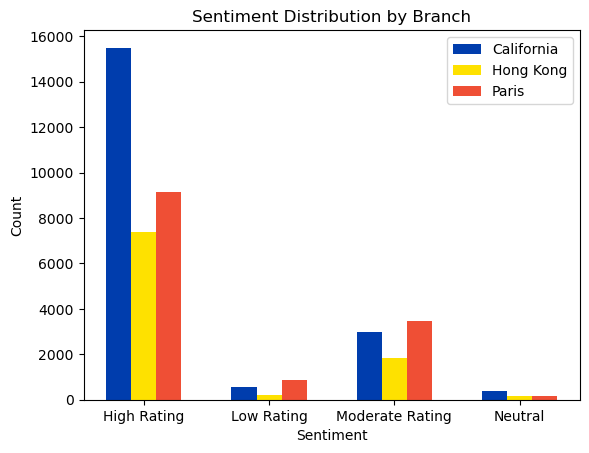

In [1]:
import matplotlib.pyplot as plt

# Data
branches = ['California', 'Hong Kong', 'Paris']
sentiments = ['High Rating', 'Low Rating', 'Moderate Rating', 'Neutral']

# Count data
california_counts = [15492, 568, 2984, 362]
hongkong_counts = [7365, 226, 1855, 174]
paris_counts = [9130, 847, 3470, 183]

# Define the Disney colors
disney_colors = ['#003DAD', '#FEE100', '#EF4F35', '#A2AAAD']

# Plotting
x = range(len(sentiments))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, california_counts, width, label='California', color=disney_colors[0])
rects2 = ax.bar([i + width for i in x], hongkong_counts, width, label='Hong Kong', color=disney_colors[1])
rects3 = ax.bar([i + 2 * width for i in x], paris_counts, width, label='Paris', color=disney_colors[2])

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution by Branch')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(sentiments)
ax.legend()

# Display the plot
plt.show()

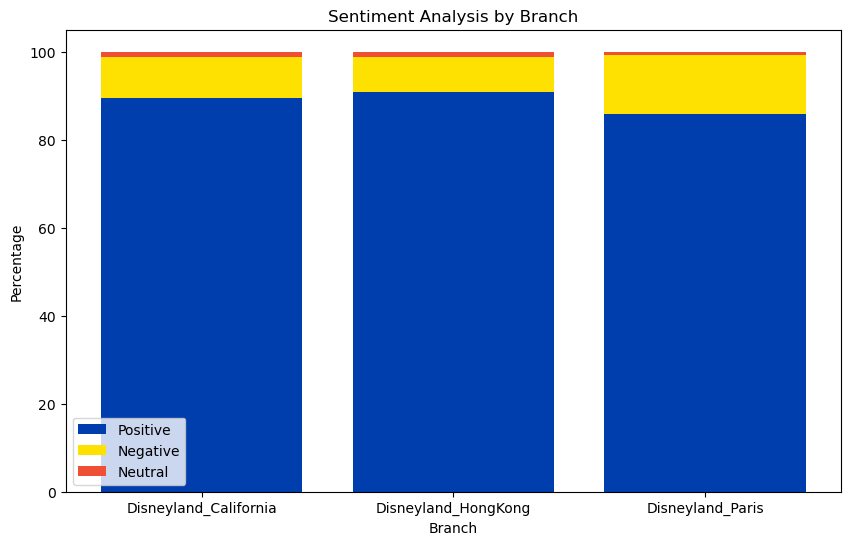

In [2]:
import matplotlib.pyplot as plt

# Data
branches = ['Disneyland_California', 'Disneyland_HongKong', 'Disneyland_Paris']
positive_percentages = [89.50, 90.71, 85.87]
negative_percentages = [9.24, 8.14, 13.31]
neutral_percentages = [1.26, 1.15, 0.83]

#colors
disney_colors = ['#003DAD', '#FEE100', '#EF4F35']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(branches, positive_percentages, label='Positive', color=disney_colors[0])
plt.bar(branches, negative_percentages, bottom=positive_percentages, label='Negative', color=disney_colors[1])
plt.bar(branches, neutral_percentages, bottom=[positive + negative for positive, negative in zip(positive_percentages, negative_percentages)],
        label='Neutral', color=disney_colors[2])

# Formatting
plt.xlabel('Branch')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis by Branch')
plt.legend()

# Show the plot
plt.show()


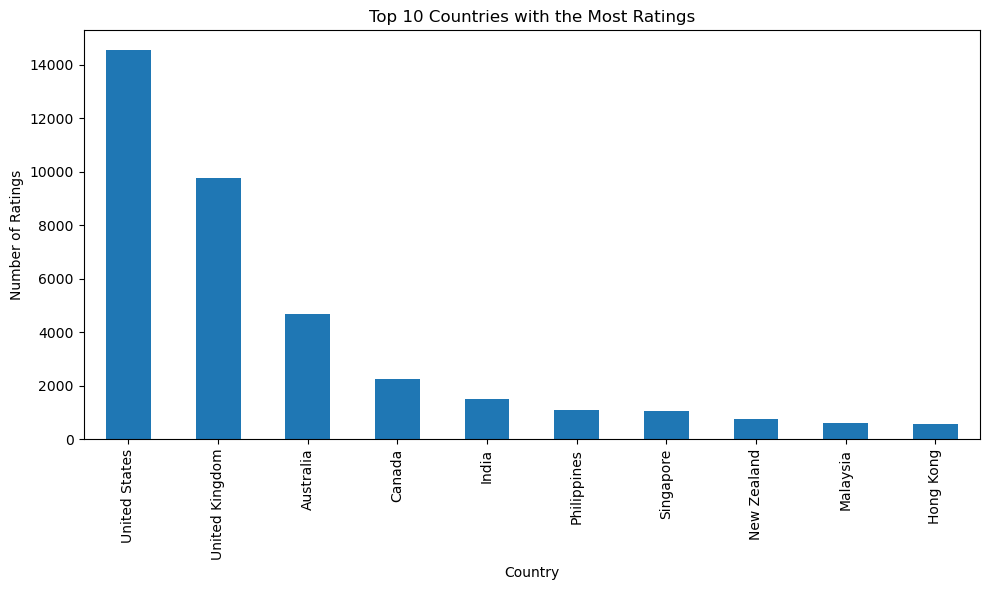

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of ratings by country
country_counts = df['Reviewer_Location'].value_counts().nlargest(10)

# Set up the plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Countries with the Most Ratings')

# Show the plot
plt.tight_layout()
plt.show()


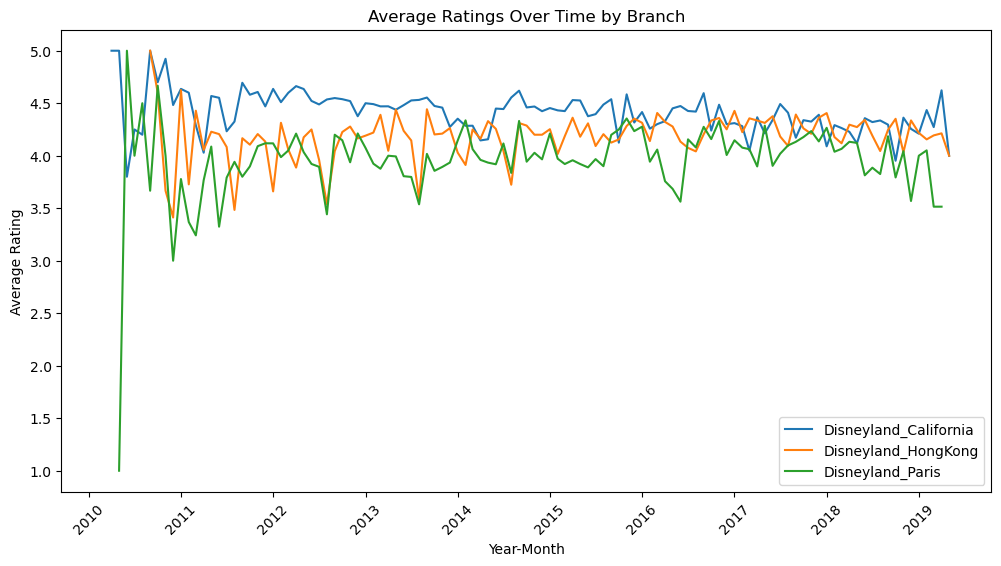

For Disneyland_California: Highest Rating Month: April, Lowest Rating Month: June
For Disneyland_HongKong: Highest Rating Month: September, Lowest Rating Month: May
For Disneyland_Paris: Highest Rating Month: March, Lowest Rating Month: May


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean missing values in the 'Year_Month' column
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')

# Remove rows with missing 'Year_Month' values
df = df.dropna(subset=['Year_Month'])

# Calculate the average ratings per month for each branch
avg_ratings_monthly = df.groupby(['Year_Month', 'Branch'])['Rating'].mean().unstack()

# Identify the months with the highest and lowest ratings for each branch
highest_ratings_month = avg_ratings_monthly.idxmax()
lowest_ratings_month = avg_ratings_monthly.idxmin()

# Visualize the ratings over time using line graphs
plt.figure(figsize=(12, 6))
for branch in avg_ratings_monthly.columns:
    plt.plot(avg_ratings_monthly.index, avg_ratings_monthly[branch], label=branch)

plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time by Branch')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print the months with the highest and lowest ratings for each branch
for branch in avg_ratings_monthly.columns:
    highest_month = highest_ratings_month[branch].strftime('%B')
    lowest_month = lowest_ratings_month[branch].strftime('%B')
    print(f"For {branch}: Highest Rating Month: {highest_month}, Lowest Rating Month: {lowest_month}")


In [47]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and calculate overall sentiment
df['Sentiment'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
overall_sentiment = df['Sentiment'].mean()

# Calculate the percentage of positive, negative, and neutral reviews for each branch
sentiment_counts = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts(normalize=True) * 100

# Print overall sentiment and percentage of sentiments for each branch
print("Overall Sentiment: {:.2f}".format(overall_sentiment))
print("Percentage of Positive Reviews: {:.2f}%".format(sentiment_counts['Positive']))
print("Percentage of Negative Reviews: {:.2f}%".format(sentiment_counts['Negative']))
print("Percentage of Neutral Reviews: {:.2f}%".format(sentiment_counts['Neutral']))


Overall Sentiment: 0.68
Percentage of Positive Reviews: 88.62%
Percentage of Negative Reviews: 10.28%
Percentage of Neutral Reviews: 1.10%


In [48]:
# Calculate the total count of reviews for each branch
branch_counts = df['Branch'].value_counts()

# Calculate the count of positive, negative, and neutral reviews for each branch
branch_sentiments = df.groupby(['Branch', 'Sentiment_Label']).size().unstack(fill_value=0)

# Calculate the percentage of positive, negative, and neutral reviews for each branch
branch_sentiments['Total'] = branch_counts
branch_sentiments['Percentage_Positive'] = (branch_sentiments['Positive'] / branch_sentiments['Total']) * 100
branch_sentiments['Percentage_Negative'] = (branch_sentiments['Negative'] / branch_sentiments['Total']) * 100
branch_sentiments['Percentage_Neutral'] = (branch_sentiments['Neutral'] / branch_sentiments['Total']) * 100

# Display the percentage of positive, negative, and neutral reviews for each branch
print(branch_sentiments[['Percentage_Positive', 'Percentage_Negative', 'Percentage_Neutral']])


Sentiment_Label        Percentage_Positive  Percentage_Negative  \
Branch                                                            
Disneyland_California            89.501154             9.240743   
Disneyland_HongKong              90.707336             8.144747   
Disneyland_Paris                 85.867339            13.305499   

Sentiment_Label        Percentage_Neutral  
Branch                                     
Disneyland_California            1.258104  
Disneyland_HongKong              1.147917  
Disneyland_Paris                 0.827162  


In [155]:
from collections import Counter
import pandas as pd
from nltk.corpus import stopwords


import nltk
nltk.download('stopwords')

# Define additional custom stopwords
custom_stopwords = ['park', 'disneyland', 'disney', 'park.','loved','rides', 'get', 'make', 'lot','going','world','park','3', 'well','time','always','every','two','times', 'one','little','show','year','queue','line','days','could','got','characters', 'children','parks', 'park','california','place','kong','visit','take', 'around','still','us','paris','hk','kids', 'back', 'first','people','day', 'even','like', 'many','really', 'also','see', 'much', 'hong', 'go', 'went', '2', 'would']

# Combine NLTK stopwords and custom stopwords
stopwords = set(stopwords.words('english') + custom_stopwords)

# Extract review texts for each branch
reviews_by_branch = {
    'Disneyland_California': df[df['Branch'] == 'Disneyland_California']['Review_Text'],
    'Disneyland_HongKong': df[df['Branch'] == 'Disneyland_HongKong']['Review_Text'],
    'Disneyland_Paris': df[df['Branch'] == 'Disneyland_Paris']['Review_Text']
}

# Process review texts and count word frequencies for each branch
word_frequencies = {}
for branch, reviews in reviews_by_branch.items():
    words = ' '.join(reviews).lower().split()
    words = [word for word in words if word not in stopwords]  # Remove stopwords
    word_frequencies[branch] = Counter(words)

# Get the most common words for each branch
most_common_words_by_branch = {}
for branch, word_freq in word_frequencies.items():
    most_common_words_by_branch[branch] = word_freq.most_common(15)

# Convert the results to a DataFrame for better visualization
result_df = pd.DataFrame(most_common_words_by_branch.items(), columns=['Branch', 'Most_Common_Words'])

# Print the results
print(result_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palvishashoaib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  Branch  \
0  Disneyland_California   
1    Disneyland_HongKong   
2       Disneyland_Paris   

                                                                                                                                                                                                                                Most_Common_Words  
0                         [(ride, 5876), (great, 5838), (fast, 5032), (pass, 4459), (wait, 4170), (lines, 3557), (food, 3471), (long, 3439), (good, 3261), (love, 3128), (fun, 2848), (family, 2567), (worth, 2484), (best, 2358), (never, 2237)]  
1  [(food, 2492), (great, 2423), (good, 2230), (ride, 2067), (small, 1919), (parade, 1891), (fireworks, 1587), (fun, 1511), (long, 1397), (worth, 1284), (experience, 1256), (enjoyed, 1224), (train, 1192), (mickey, 1130), (attractions, 1121)]  
2                        [(food, 4987), (good, 4502), (ride, 4310), (great, 4309), (staff, 3607), (fast, 3373), (queues, 3306), (long, 3006), (hotel, 2738)

In [156]:
# Convert the results to a DataFrame for better visualization
result_df = pd.DataFrame(most_common_words_by_branch.items(), columns=['Branch', 'Most_Common_Words'])

result_df['Most_Common_Words'] = result_df['Most_Common_Words'].apply(lambda x: [word[0] for word in x])

# Print the results
pd.set_option('display.max_colwidth', None)  # To display complete lists without truncation
print(result_df)


                  Branch  \
0  Disneyland_California   
1    Disneyland_HongKong   
2       Disneyland_Paris   

                                                                                                        Most_Common_Words  
0                         [ride, great, fast, pass, wait, lines, food, long, good, love, fun, family, worth, best, never]  
1  [food, great, good, ride, small, parade, fireworks, fun, long, worth, experience, enjoyed, train, mickey, attractions]  
2                        [food, good, ride, great, staff, fast, queues, long, hotel, wait, worth, parade, pass, big, old]  


In [133]:
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

# Preprocessing: Exclude specific words
stop_words = stopwords.words('english') + ['really', 'up', 'see', 'much', 'me', 'around', 'than', 'other', 'he', 'she',
                                           'then', 'got', 'see', 'children', 'kids', 'by', 'also', 'both', 'more', 'about',
                                           'some', 'like', 'do', 'went', 'only', 'or', 'been', 'down', 'an', 'back', 'out',
                                           'place', 'to', 'we', 'my', 'all', 'but', 'ride', 'when', 'just', 'can', 'have',
                                           'so', 'go', 'very', 'one', 'us', 'which', 'day', 'just', 'some', 'up', 'will',
                                           'from', 'your', 'had', 'if', 'they', 'be', 'all', 'no', 'on', 'our', 'paris',
                                           'california', 'disney', 'disneyland', 'you', 'that', 'was', 'with', 'this', 'as',
                                           'there', 'not', 'at', 'in', 'were', 'for', 'of', 'and', 'is', 'it', 'are', 'would',
                                           'every', 'park', 'get', 'people', "two", "well", "even","pm","euros",'disney', 'big', 'many', 'days', 'times', 'minutes','old', 'year', "n't"]

# Tokenization and filtering
data_words = []
for review in reviews:
    words = simple_preprocess(review, deacc=True)
    filtered_words = [word for word in words if word not in stop_words]
    data_words.append(filtered_words)

# Create the dictionary
id2word = corpora.Dictionary(data_words)

# Filter out extreme words based on their frequency
id2word.filter_extremes(no_below=10, no_above=0.3)

# Create the corpus
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=42)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")



Topic 0: 0.012*"good" + 0.011*"great" + 0.011*"characters" + 0.009*"queues" + 0.008*"parade" + 0.008*"staff" + 0.007*"show" + 0.007*"long" + 0.006*"queue" + 0.006*"take"
Topic 1: 0.009*"visit" + 0.007*"good" + 0.007*"great" + 0.006*"first" + 0.006*"expensive" + 0.006*"fun" + 0.005*"parks" + 0.005*"experience" + 0.005*"amazing" + 0.005*"enjoy"
Topic 2: 0.009*"parks" + 0.007*"closed" + 0.006*"staff" + 0.006*"mountain" + 0.006*"florida" + 0.005*"attractions" + 0.005*"visit" + 0.004*"good" + 0.004*"experience" + 0.004*"queue"
Topic 3: 0.014*"hotel" + 0.006*"could" + 0.006*"fast" + 0.006*"parks" + 0.006*"good" + 0.006*"queue" + 0.005*"great" + 0.005*"breakfast" + 0.005*"pass" + 0.005*"take"
Topic 4: 0.012*"mountain" + 0.011*"great" + 0.011*"good" + 0.010*"queues" + 0.008*"peter" + 0.008*"buzz" + 0.007*"pan" + 0.007*"small" + 0.007*"thunder" + 0.007*"characters"


In [141]:


# Assuming you have the Disneyland dataset loaded in a DataFrame called 'df'

# Group the data by branch and count the occurrences of each country
branch_locations = df.groupby('Branch')['Reviewer_Location'].value_counts()

# Get the top locations for each branch
top_locations_branch1 = branch_locations['Disneyland_HongKong'].nlargest(5)
top_locations_branch2 = branch_locations['Disneyland_California'].nlargest(5)
top_locations_branch3 = branch_locations['Disneyland_Paris'].nlargest(5)

# Print the top locations for each branch
print("Top Locations - Disneyland Hong Kong:")
print(top_locations_branch1)
print()

print("Top Locations - Disneyland California:")
print(top_locations_branch2)
print()

print("Top Locations - Disneyland Paris:")
print(top_locations_branch3)


Top Locations - Disneyland Hong Kong:
Reviewer_Location
Australia        1547
India            1051
Philippines       949
United States     836
Singapore         798
Name: Reviewer_Location, dtype: int64

Top Locations - Disneyland California:
Reviewer_Location
United States     11474
Australia          2324
Canada             1752
United Kingdom      965
New Zealand         502
Name: Reviewer_Location, dtype: int64

Top Locations - Disneyland Paris:
Reviewer_Location
United Kingdom    7449
United States     1212
Australia          541
Ireland            403
India              285
Name: Reviewer_Location, dtype: int64


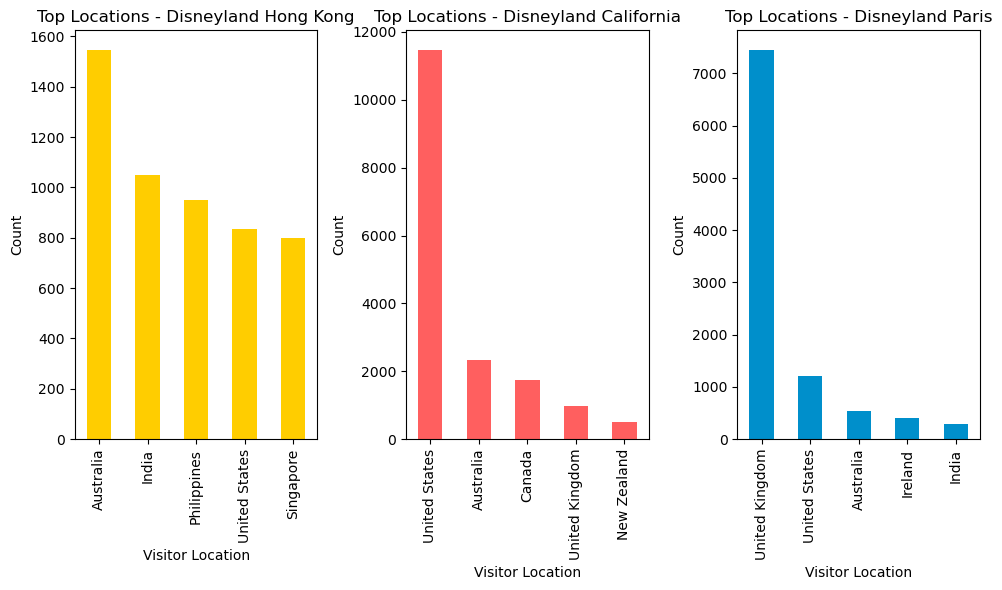

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for each branch
color_palette = {
    'Disneyland_HongKong': '#FFCD00',  # Yellow
    'Disneyland_California': '#FF5F5F',  # Red
    'Disneyland_Paris': '#008FCB'  # Blue
}

# Group the data by branch and count the occurrences of each country
branch_locations = df.groupby('Branch')['Reviewer_Location'].value_counts()

# Get the top locations for each branch
top_locations_branch1 = branch_locations['Disneyland_HongKong'].nlargest(5)
top_locations_branch2 = branch_locations['Disneyland_California'].nlargest(5)
top_locations_branch3 = branch_locations['Disneyland_Paris'].nlargest(5)

# Create bar plots for each branch with consistent colors
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
top_locations_branch1.plot(kind='bar', color=color_palette['Disneyland_HongKong'])
plt.title('Top Locations - Disneyland Hong Kong')
plt.xlabel('Visitor Location')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
top_locations_branch2.plot(kind='bar', color=color_palette['Disneyland_California'])
plt.title('Top Locations - Disneyland California')
plt.xlabel('Visitor Location')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
top_locations_branch3.plot(kind='bar', color=color_palette['Disneyland_Paris'])
plt.title('Top Locations - Disneyland Paris')
plt.xlabel('Visitor Location')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


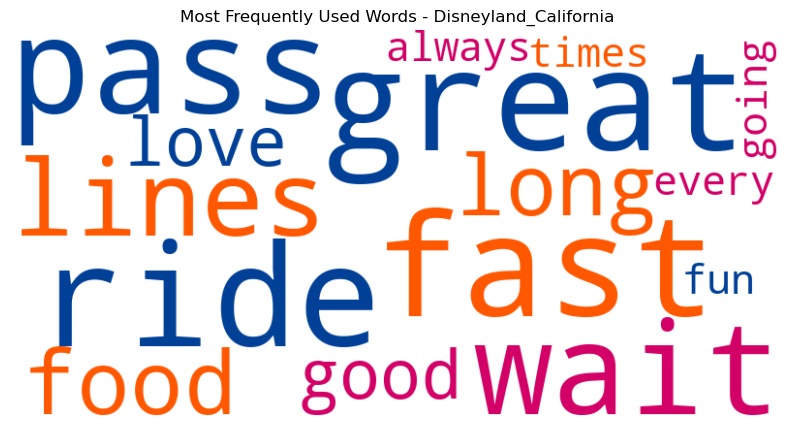

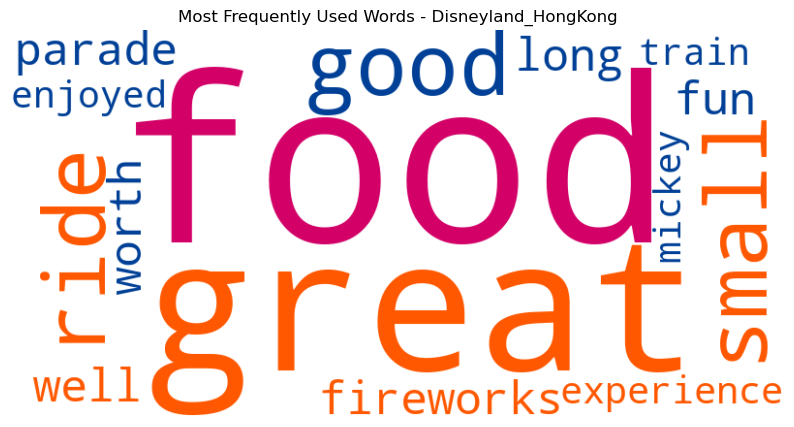

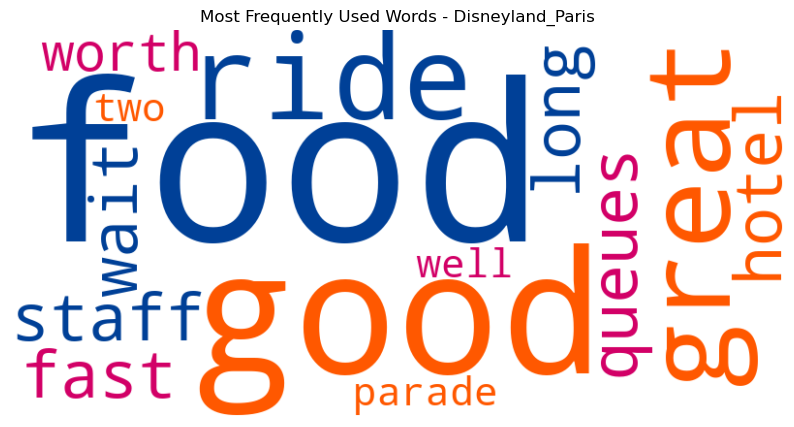

In [145]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

# Define Disneyland colors
disneyland_colors = ['#004097', '#ff5800', '#d20067']

# Convert the results to a DataFrame for better visualization
result_df = pd.DataFrame(most_common_words_by_branch.items(), columns=['Branch', 'Most_Common_Words'])

# Expand the ellipsis in Most_Common_Words column
result_df['Most_Common_Words'] = result_df['Most_Common_Words'].apply(lambda x: [word[0] for word in x])

# Create word clouds for each branch
for index, row in result_df.iterrows():
    branch = row['Branch']
    words = row['Most_Common_Words']
    
    # Join the words into a single string
    text = ' '.join(words)
    
    # Generate the word cloud with custom color map
    colormap = ListedColormap(disneyland_colors)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequently Used Words - {branch}')
    plt.axis('off')
    plt.show()



In [196]:
import pandas as pd
import scipy.stats as stats

# Define the top 10 countries
top_countries = ['United States', 'United Kingdom', 'Australia', 'India', 'Canada']

# Filter the data for the top 10 countries
filtered_df = df[df['Reviewer_Location'].isin(top_countries)]

# Perform ANOVA test
result = stats.f_oneway(filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'United States'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'United Kingdom'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'Australia'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'India'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'Canada'])

# Print the result
print("ANOVA Test Result:")
print("F-Statistic:", result.statistic)
print("p-value:", result.pvalue)

# Perform t-tests for pairwise comparisons
countries = filtered_df['Reviewer_Location'].unique()

for i in range(len(countries)):
    for j in range(i+1, len(countries)):
        country_1 = countries[i]
        country_2 = countries[j]
        
        ratings_1 = filtered_df['Rating'][filtered_df['Reviewer_Location'] == country_1]
        ratings_2 = filtered_df['Rating'][filtered_df['Reviewer_Location'] == country_2]
        
        result = stats.ttest_ind(ratings_1, ratings_2)
        
        print(f"\nT-Test Result: {country_1} vs {country_2}")
        print("t-statistic:", result.statistic)
        print("p-value:", result.pvalue)

ANOVA Test Result:
F-Statistic: 119.10045359385273
p-value: 4.666646924800124e-101

T-Test Result: Australia vs United Kingdom
t-statistic: 13.244385376222835
p-value: 8.301635642532032e-40

T-Test Result: Australia vs India
t-statistic: -4.618909744739558
p-value: 3.9356948060682e-06

T-Test Result: Australia vs United States
t-statistic: -0.400497723478391
p-value: 0.6887944094825034

T-Test Result: Australia vs Canada
t-statistic: 0.5071100109424044
p-value: 0.6120938089183375

T-Test Result: United Kingdom vs India
t-statistic: -12.555438404470204
p-value: 6.455437577576458e-36

T-Test Result: United Kingdom vs United States
t-statistic: -18.836874313951792
p-value: 1.3680351317576627e-78

T-Test Result: United Kingdom vs Canada
t-statistic: -9.293576822071092
p-value: 1.7480323103243808e-20

T-Test Result: India vs United States
t-statistic: 4.463184372747003
p-value: 8.129991014849964e-06

T-Test Result: India vs Canada
t-statistic: 4.523497073064545
p-value: 6.271205775961528e-0

Disneyland_HongKong:
January: 4.24
February: 4.15
March: 4.28
April: 4.24
May: 4.27
June: 4.26
July: 4.10
August: 3.91
September: 4.25
October: 4.25
November: 4.24
December: 4.26

Disneyland_California:
January: 4.39
February: 4.37
March: 4.35
April: 4.39
May: 4.39
June: 4.43
July: 4.43
August: 4.47
September: 4.53
October: 4.35
November: 4.49
December: 4.36

Disneyland_Paris:
January: 4.16
February: 4.02
March: 3.95
April: 3.93
May: 3.98
June: 3.81
July: 3.97
August: 3.84
September: 4.16
October: 4.05
November: 4.14
December: 4.01



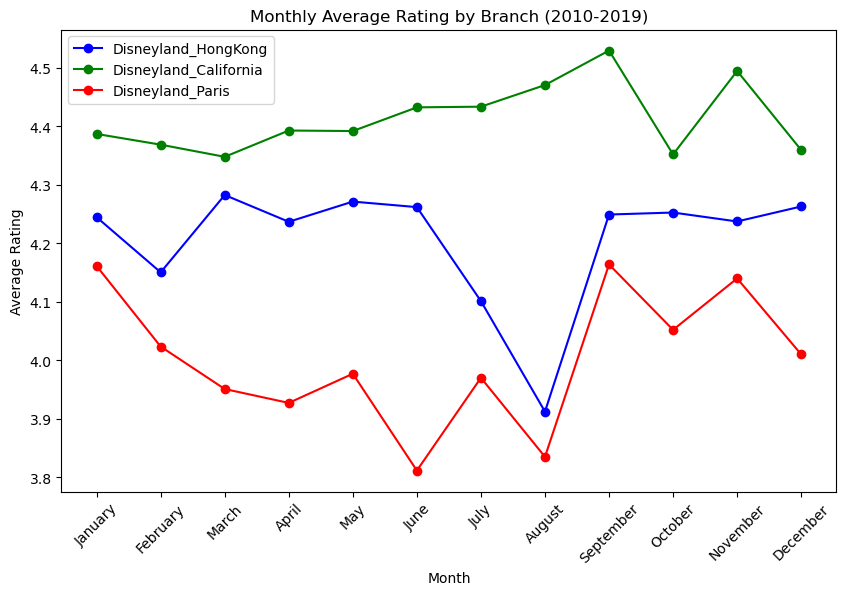

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# Convert 'Year_Month' column to datetime type
df['Year_Month'] = pd.to_datetime(df['Year_Month'])

# Extract month and year from 'Year_Month' column
df['Month'] = df['Year_Month'].dt.month

# Group by branch and month and calculate the average rating
branch_monthly_avg = df.groupby(['Branch', 'Month'])['Rating'].mean().reset_index()

# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot the monthly average ratings for each branch
plt.figure(figsize=(10, 6))

branches = df['Branch'].unique()
colors = ['blue', 'green', 'red']

for i, branch in enumerate(branches):
    branch_data = branch_monthly_avg[branch_monthly_avg['Branch'] == branch]
    plt.plot(month_names, branch_data['Rating'], marker='o', label=branch, color=colors[i])
    print(f"{branch}:")
    for month, rating in zip(month_names, branch_data['Rating']):
        print(f"{month}: {rating:.2f}")
    print()

plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Monthly Average Rating by Branch (2010-2019)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [198]:
import pandas as pd
import scipy.stats as stats

# Define the top 5 countries
top_countries = ['United States', 'United Kingdom', 'Australia', 'India', 'Canada']

# Filter the data for the top 5 countries
filtered_df = df[df['Reviewer_Location'].isin(top_countries)]

# Perform ANOVA test
result = stats.f_oneway(filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'United States'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'United Kingdom'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'Australia'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'India'],
                         filtered_df['Rating'][filtered_df['Reviewer_Location'] == 'Canada'])

# Print the result
print("ANOVA Test Result:")
print("F-Statistic:", result.statistic)
print("p-value:", result.pvalue)


ANOVA Test Result:
F-Statistic: 119.10045359385273
p-value: 4.666646924800124e-101
